# MACHINE LEARNING - UNPSUPERVISED FINAL
    
    Authors : Mansi Yadav, Jasmine Assan, Omar Hernandez, Lukas Baumann, Gonzalo Avila & Jason Lee
    Date   : March 25th, 2020
    
    
    
# Windows vs. Macbook

Countless consumers have pondered this question when preparing to buy a new computer. As a result, Apple (AAPL) and Microsoft (MSFT) have been rigorously researching several aspects of consumer buying behavior in regards to the decision making behind this question. Both firms have commissioned research and analysis teams to study aspects such as system architecture, security, and overall performance.

Recently, Microsoft has decided to approach this question from the perspective of the Big Five personality traits as well as the Hult DNA. As such, your team has been commissioned to run an analysis on these factors. Microsoft is looking forward to receiving your key insights, as well as an organized Jupyter Notebook that can be shared with their internal analytical teams. They also have sent you a kind reminder to utilize external research to support your findings and to give details related to important information such as audience size.

The Big Five personality test measures the five personality factors that psychologists have determined are core to our personality makeup. The Five Factors of personality are:

- Openness - How open a person is to new ideas and experiences
- Conscientiousness - How goal-directed, persistent, and organized a person is
- Extraversion - How much a person is energized by the outside world
- Agreeableness - How much a person puts others' interests and needs ahead of their own
- Neuroticism - How sensitive a person is to stress and negative emotional triggers

# Analysis
In this analysis we will look into 392 survey responders that answered 77 questions. We will look into separating the types of questions into their Big Five personality traits. We will also separate the Hult DNA questions into 3 groups based on information provided in the Hult Handbook. Using this information we will explore the data and determine if there are any overarching insights prior to diving deeper into the analysis.

After exploration, we will organize our data and utilize unsupervised machine learning techniques - PCAs and Clustering to determine the types of customer that would purchase either a Macbook or Windows computer. Our goal is to help Microsoft determine unique customers that can be isolated and find out which customers are more inclined to remain or switch from their current laptop owned.

### Data Source: 392 Hult Graduate Students

# Report Contents

    1. Hypothesis
    2. Exploration / Cleaning
        1. Cleaning
        2. Demographics
    3. Initial Insights
    4. Data Preparation
        1. Big Five Grouping
        2. Big Five Formula
        3. Hult DNA Grouping
        4. Hult DNA Formula
        5. Correlation
    5. PCA Model
        1. Scaling Data
        2. PCA - No Max Components
        3. PCA - Limited Components
        4. Factor Loading
            1. User Personas
            2. Potential Customer Segments
    6. Clustering
        1. Scaling PCA Data
        2. Test Clusters
        3. Centroids
    7. Results
        1. Combined Results
        2. Continued Exploration
    8. Overview
        1. Insights
        2. Recommendations
    9. Sources

In [1]:
# Import packages
import pandas                  as pd
import matplotlib.pyplot       as plt                  
import seaborn                 as sns          
import numpy                   as np
from   sklearn.preprocessing   import StandardScaler 
from   sklearn.decomposition   import PCA            
from   scipy.cluster.hierarchy import dendrogram, linkage 
from   sklearn.cluster         import KMeans              

# Load the data
file      = "Survey_Data_Final_Exam.xlsx"
survey_df = pd.read_excel(file)

# Setting print options
pd.set_option('display.max_rows',     500)
pd.set_option('display.max_columns',  500)
pd.set_option('display.width',       1000)
pd.set_option('display.max_colwidth', 100)

# 1. HYPOTHESIS

In preparation of this analysis, research was done to gain domain knowledge about the perceived differences between Macbook and Windows users. Outlined below are the hypotheses obtained:



<b><u>Hypothesis 1:</u></b><br>
Higher levels of the extraversion and openness from the Big Five personality traits are scored by Macbook users.

<i>According to [Mindset Media](https://www.pcworld.com/article/141473/article.html) people who purchase Macbooks fall into what the branding company calls the "Openness 5" personality category -- which means they are more liberal, less modest and more assured of their own superiority than the population at large.</i>

<b><u>Hypothesis 2:</u></b><br>
Windows users score higher in conscientiousness from the Big Five personality traits and lower in the Thinking category of the Hult DNA.

<i>In an article, [Mac vs PC People: ](https://kellynford.com/2009/11/24/mac-vs-pc-people-personality-traits-aestheticmedia-choices/) windows users trend towards more mainstream alternatives and are more numbers oriented, factual and steady, hard workers.</i>

<b><u>Hypothesis 3:</u></b><br>

Personality traits and region of country will hold a predictive value for the type of computer currently used and preferred.

In [2]:
# # Explore  dataset
# survey_df.head()

------------------------------

# 2. EXPLORATION
To get a better understanding of our data we will conduct some general exploration to observe the types of data we have available from the survey. We will explore specific demographics, and also conduct cleaning or grouping when necessary. The survey consists of 77 questions, split into various categories to determine eventually how we can manage and prepare our data for the PCA model and Clustering.

In [3]:
# # Numbers of cols and name of columns. if ".1" at the end its a duplicate
# survey_df.info()

Some interesting things to note from examining the data:
    
   - There are 3 rows which have exact duplicates of one another. These duplicates are located very near each other so we know that they were asked almost consecutively.
   - Next there is one missing value from the question about ethnicity.
   - There is data of object types which are located in the end of the survey. This data is related to demographic information.
   - The first question is the surveyID which would not provide any value for our analysis. (Drop it later)
   
------------------------------------

# Summary Statistics

In [4]:
# # summary statistics
# survey_df.describe().round(2)

General insights:

 - All the results are almost identical since they are all questions from a scale from 1-5, so we wouldn't get any surprising numbers.
 
Low Mean Scores:
 - Question - "Insult people" has the lowest mean rating at 1.73. This could tell us that people don't like hurting other people's feelings so the score is low
 - Question - Do not have a good imagination" had a low mean rating 2.11, telling us that most users believe that have a good imagination and think out of the box.
 - Question "Am not interested in abstract ideas" had a low mean rating 2.13, we could speculate that people are interested in abstract ideas and are generally curious.

High Mean Scores:
 - Question "Drive for results", had the highest average score 4.28. This question was part of the Hult DNA group, meaning a lot of students at Hult could be motivated to succeed.
 - Questions "Work well with people from diverse cultural backgrounds", also scored high at 4.26 average score. This would make sense since Hult is one of the most diverse International schools in the world. We would expect students to be familiar with working with multiple cultures. 
 - Question "Display a growth mindset", another Hult DNA question where there was a high mean score. Similarly to drive results, this could tell us the type of student body we have at Hult and motivate individuals are continuously looking to grow.

---------------------------------------

# Demographics
To continue our exploration we will look into demographic related information. Before we construct the PCA model, we want to see if we can find any interesting insights from the demographics we have. When building our PCA model we will be dropping these variables (more explained later), in order to reduce bias.

## Laptop Owned

In exploring the data we wanted to determine through a preliminary analysis the percentage of the audience that currently had a Macbook or Windows. The value counts for the current laptops that the survey responders own produced the following results:

~~~
Macbook           199
Windows laptop    192
MAC                 1
~~~

MAC is the shorthand name for Macbook and as such this data entry would be changed to Macbook.

The preference for a Windows and Macbook are almost proportionate in this audience with 51% of the responders preferring Macbooks to 49% for Windows. There is one outlier "MAC" so we will clean that to make sure it falls into the "Macbook" grouping.

In [5]:
# Replacing MAC with Macbook in the dataset
survey_df['What laptop do you currently have?'].replace(to_replace = 'MAC', 
                                                             value = 'Macbook', 
                                                           inplace = True)

In [6]:
# # Pie chart, where the slices will be ordered and plotted counter-clockwise:

# labels = 'Macbook', 'Windows'
# sizes = survey_df['What laptop do you currently have?'].value_counts()
# explode = (0, 0.1)  

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=True, startangle=90)
# ax1.axis('equal')  

# plt.show()

## Next Laptop

Another preliminary analysis on the type of laptop each respondent will own next with cost remaining the same showed MAC as an answer and was replaced with Macbook. The following results were produced:

~~~
Macbook           219
Windows laptop    163
Chromebook         10
~~~

<b>55.9%</b> of the audience in the sample dataset would purchase a Macbook next if all laptops cost the same. This is an additional <b>4.9%</b> from those who currently own Macbooks. This could indicate that price is a high priority to the 4.9% and would be investigated further. <b>41.6%</b> would purchase a Windows. 

An interesting point is that Chromebook was a laptop that <b>2.6%</b> of the audience would purchase if all laptops cost the same. With such a small proportion and the focus of the analysis being for Windows or Macbook's, we would not consider this for further analysis.

There is also another value tagged as "MAC" so we will clean that below.

In [7]:
# Replacing MAC with Macbook in the dataset
survey_df['What laptop would you buy in next assuming if all laptops cost the same?'].replace(
                                                        to_replace = 'MAC', 
                                                        value      = 'Macbook', 
                                                        inplace    = True)

In [8]:
# # Pie chart, where the slices will be ordered and plotted counter-clockwise:

# labels = 'Macbook', 'Windows','Chromebook'
# sizes = survey_df['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()
# explode = (0, 0, 0.1,)

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=True, startangle=90)
# ax1.axis('equal')  

# plt.show()

----------------------------------

## Current Program
The participants in this survey are from four different programs, having 50.5% of participants doing Dual Degree Business Analytics after studying MIB, One-year Business Analytics students with 25.3%, followed closely by Dual Degree Business Analytics after studying MBA with 23.7%, and Dual Degree Disruptive Innovation after studying MBA with only 0.5% of participants.

The following table details the participants per program:

Program	|Number of Students|	Percent on Survey|
---|----|----|
DD (MIB & Business Analytics)	|198|	50.5%|
One year Business Analytics	|99	|25.3%|
DD (MBA & Business Analytics)	|93|	23.7%|
DD (MBA & Disruptive innovation)|	2	|0.5%|

Following the previous table, 192 participants (49% of the total survey) have a Windows laptop and the distributions of these Windows-user students are 39.6% in MIB-MBAN, 31.8% in MBA-MBAN, and 28.6% in One-year Business Analytics.

Program	|Number of Students	|Percent on Survey|
----|-----|----|
DD (MIB & Business Analytics)	|76	|39.6%|
One year Business Analytics|	61|	31.8%|
DD (MBA & Business Analytics)	|55|	28.6%|
DD (MBA & Disruptive innovation)	|0	|0.0%|


As a last take away, the few MBA-MDI students do not use a Windows laptop for the moment, although these particular users specified they would buy a Windows laptop.



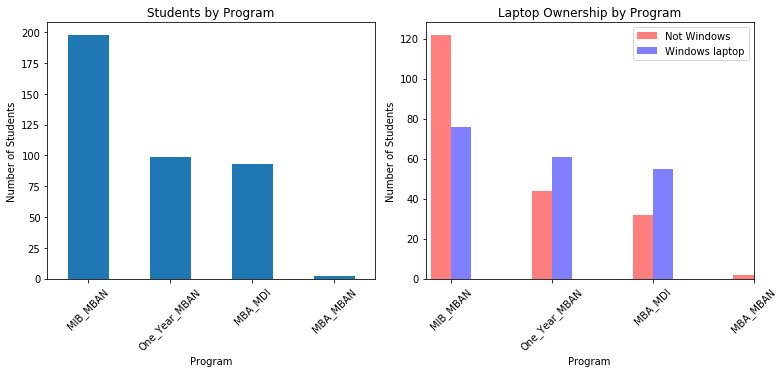

In [9]:
# Graphic number of users per program
# Renaming x-axis tick labels
positions = (0,1,2,3)
labels    = ('MIB_MBAN','One_Year_MBAN', 'MBA_MDI', 'MBA_MBAN')

# Plotting programs
fig, ax   = plt.subplots(figsize = (11, 9))
plt.subplot(2, 2, 1)

survey_df['What program are you in?'].value_counts().plot(kind = 'bar')
plt.xticks(positions, labels)
plt.xticks(rotation = 45)
plt.title("Students by Program")
plt.ylabel("Number of Students")
plt.xlabel("Program")

# Graphing by Windows Ownership
# Renaming x-axis labels for new graph
positions = (0,1,2,3)
labels    = ('MIB_MBAN','One_Year_MBAN', 'MBA_MDI', 'MBA_MBAN')

# Plotting windows owners by program
plt.subplot(2, 2, 2)
survey_df['What program are you in?'][survey_df['What laptop do you currently have?']\
          != "Windows laptop"].value_counts().plot(kind='bar', color = 'r', 
                                                   alpha = 0.5, width=0.2, 
                                                   position=1)
survey_df['What program are you in?'][survey_df['What laptop do you currently have?']\
          == "Windows laptop"].value_counts().plot(kind='bar',color = 'b', 
                                                   alpha = 0.5, width=0.2, 
                                                   position=0)

# ax.set_xticklabels(labels)
plt.xticks(positions, labels)
plt.title("Laptop Ownership by Program")
plt.ylabel("Number of Students")
plt.xlabel("Program")
plt.legend(['Not Windows','Windows laptop'])
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

---------------------------

## Age 
Looking at the distribution of our ages, we can see a pretty decent spread from ages since the programs at Hult have students coming from all background. We see a majority of users fall in the 20-24 age range. We did find one outlier which had a student at 15 year old. This is not normal since the minimum age required to enroll would be at least 18.

In [10]:
# # Distribution of age
# survey_df['What is your age?'].value_counts()

As it is impossible for a 15 year old to attend Hult, we assume that this was a typo of the participant. As we still want to use the other answers, we will replace this value with the median age of the other participants.

In [11]:
# Replace one value with a the age 15 to the median age of our surveyers
survey_df['What is your age?'].replace(to_replace = 15, 
                                            value = int(survey_df['What is your age?'].median()), 
                                          inplace = True)

In [12]:
# # Looking at the histogram while differentiating which age group currently has a macbook (red) or Windows (blue)
# survey_df['What is your age?'].plot.hist(color = 'b', alpha = 0.5)
# survey_df['What is your age?'][survey_df['What laptop do you currently have?']=='Windows laptop'].plot.hist(color = 'r',alpha = 0.5)

The distribution of macbook and windows owners seems to be quite similar. Although for the age group of people younger than 25, the proportion of macbook users compared to windows users is comparably high. This is why we want to see if generations might have something to do with this:

### Generation Considerations

According to a [McKinsey](https://www.mckinsey.com/industries/consumer-packaged-goods/our-insights/true-gen-generation-z-and-its-implications-for-companies)report Gen Z are characterized as being independent, self-confident and autonomous. Their consumption habits lean towards uniqueness, ethical and unlimited. On the other hand, Gen Y are confident and ambitious and highly value teamwork. Their consumption habits lean towards experience, festivals, travel and flagships (best products or services). Generations may be utilized as a predictor as it will be interesting to see if such traits are shown in the survey datasets after further unsupervised analysis.
 


According to this [Harvard Business Review Article](https://hbr.org/2017/08/a-survey-of-19-countries-shows-how-generations-x-y-and-z-are-and-arent-different), Generations Y (or Millennials) is considered as people born in between 1984 and 1996 and Generation Z is considered as people born in 1997 or later.

For the suvey takers, this gives us the following distribution:

In [13]:
# gen_z = survey_df['What is your age?'][survey_df['What is your age?'] <= 23]
# gen_y = survey_df['What is your age?'][survey_df['What is your age?'] >  23]

# # Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = 'Gen Y', 'Gen Z'
# sizes = [len(gen_y), len(gen_z)]
# explode = (0, 0.1)  

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  

# plt.show()

In [14]:
# # proportion of users than OWN Windows in Generation Z vs Y
# print("% of Generation Z that own Windows:")
# print(survey_df[(survey_df['What is your age?'] <= 23) & (survey_df['What laptop do you currently have?']=='Windows laptop')]['surveyID'].count()/survey_df[(survey_df['What is your age?'] <= 23)]['surveyID'].count())

# print("% of Generation Y that own Windows:")
# print((survey_df[(survey_df['What is your age?'] > 23) & (survey_df['What laptop do you currently have?']=='Windows laptop')]['surveyID'].count()/survey_df[(survey_df['What is your age?'] > 23)]['surveyID'].count()).round(2))

In [15]:
# # proportion of users than WANT NEXT Windows in Generation Z vs Y
# print("% of Generation Z that own Windows:")
# print(survey_df[(survey_df['What is your age?'] <= 23) & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']=='Windows laptop')]['surveyID'].count()/survey_df[(survey_df['What is your age?'] <= 23)]['surveyID'].count())

# print("% of Generation Y that own Windows:")
# print((survey_df[(survey_df['What is your age?'] > 23) & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']=='Windows laptop')]['surveyID'].count()/survey_df[(survey_df['What is your age?'] > 23)]['surveyID'].count()).round(2))

Unfortunately, only 60 people can be categorized as generation z which makes it too small of a portion to consider further in the analysis. However we do have some interesting numbers in the ownership percentages despite the smaller population.

<br></br>

<center>Current Computer -  By Generation</center>

Name | Gen Z (60) | Gen Y (332) |
---|----| ---|
Windows | 25%  | 53%
Macbook | 75% | 47%

We can see that the younger Generation (Z) have a significantly higher ownership of Macbooks than Windows. Whereas Generation Y is a close split, favoring more Windows.

<center>Next Computer -  By Generation</center>

Name | Gen Z (60) | Gen Y (332) |
---|----| ---|
Windows | 27%  | 44%
Macbook | 73% | 56%

Looking at both the numbers, it looks like Gen Y want to change their next laptop to a Mac. It is important to study psychometric behaviour to understand why a customer is looking to switch. We will study the effects on patterns and behaviours later on in the analysis.

---------------------------------------

## Gender
We would want to find out how many male and females own a Macbook vs a Windows. Below we can see the distribution of gender and laptop ownership. 
<center>Currently Owned - Gender Distribution</center>

Name | Male (227) | Female (165) |
---|----| ---|
Windows | 55%  | 41%
Macbook | 45% | 59%

We can see that there are a total of 227 Male surveys and 55% of them own a Windows, where females have 165 surveys and a higher percentage own a Macbook.

<center>Next Computer - Gender Distribution</center>

Name | Male (227) | Female (165) |
---|----| ---|
Windows | 47%  | 35%
Macbook | 50% | 63%
Chromebook | 3% | 2%

Interesting we see that now we have both Male and Female more in favor for Macbook computers. The female ownership saw significant jump in Macbook interest, and the Male saw a change in favored brand. We also see the addition of a third brand, the Chromebook. The Chromebook takes a small percentage nonetheless. Clearly users if given a choice they would switch to the Macbook.

In [16]:
# # Distribution of CURRENT computer
# # count of females with windows
# survey_df[(survey_df['Gender']!="Male") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Gender']!="Male"]['surveyID'].count()

# # count of males with windows
# survey_df[(survey_df['Gender']=="Male") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Gender']=="Male"]['surveyID'].count()

In [17]:
# # Distribution of NEXT computer
# # count of females with windows
# survey_df[(survey_df['Gender']!="Male") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Gender']!="Male"]['surveyID'].count()

# # count of males with windows
# survey_df[(survey_df['Gender']=="Male") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Gender']=="Male"]['surveyID'].count()

---------------------------

## Improving Nationality
As it happens in most unstructured survey questions, the contestants replied to the question "What is your nationality?" in many different ways. Most people provided their respective demonym. However, some people entered China instead of Chinese, India instead of Indian, or even a "." as an answer. We decided to correct it the following way:

- Changed all country names to the respective demonym. i.e.: China changed into Chinese
- Changed all multi-ethnic people to a multi-ethnic category. i.e.: French/ Brazilian changed into Multi-ethnic
- Changed "." or "calm" answers to "Prefer not to answer" category.

In [18]:
# Just to show how it looks duplicated
# survey_df[survey_df['What is your nationality? '] == 'indian.']
# Removing undercapitalized values
nationality = survey_df['What is your nationality? '].str.capitalize()

# Placing new subset into new colum called 'nationality'
survey_df['nationality'] = nationality

### Cleaning Nationalities

In [19]:
# Dictionary to rename nationality
replaceable_names = {"India"               : "Indian",
                     "Indian."             : "Indian",
                     "Calm"                : "Prefer not to answer",
                     "."                   : "Prefer not to answer", 
                     "China"               : "Chinese",
                     "Taiwan"              : "Taiwanese",
                     "Taiwan( r.o.c)"      : "Taiwanese",
                     "Usa"                 : "American",
                     "Japan"               : "Japanese",
                     "Republic of korea"   : "South Korean",
                     "Ecuador"             : "Ecuadorian",
                     "Brazil"              : "Brazilian",
                     "Russia"              : "Russian",
                     "Spain"               : "Spanish",
                     "Colombia"            : "Colombian",
                     "Indonesia"           : "Indonesian",
                     "Czech republic"      : "Czech",
                     "Panama"              : "Panamanian",
                     "German/american"     : "Multi-ethnic",
                     "South korea"         : "South Korean",
                     "Mauritius"           : "Mauritian",
                     "Italian and spanish" : "Multi-ethnic",
                     "British, indian"     : "Multi-ethnic",
                     "Nigeria"             : "Nigerian",
                     "Korea"               : "South Korean",
                     "Germany"             : "German",
                     "Philippines"         : "Filipino",
                     "Filipino "           : "Filipino",
                     "Peru"                : "Peruvian",
                     "Canada"              : "Canadian",
                     "Belarus"             : "Belarusian",
                     "Congolese (dr congo)": "Congolese",
                     "Dominican "          : "Dominican",
                     "Dominican republic"  : "Dominican",
                     "French/ brazilian"   : "Multi-ethnic",
                     "Caribbean-american"  : "American",
                     "Thailand"            : "Thai",
                     "Belgian "            : "Belgian",
                     "Belgium"             : "Belgian",
                     "Malaysia"            : "Malaysian",
                     "Mexico"              : "Mexican",
                     "Poland"              : "Polish",
                     "Cameroon"            : "Cameroonian",
                     "Armenia"             : "Armenian",
                     "Iran"                : "Iranian",
                     "El salvador"         : "Salvarorian",
                     "Hispanic "           : "Prefer not to answer",
                     "Korean"              : "South Korean",
                     "South african"       : "South African",
                     "Costa rica"          : "Costarrican",
                     "Venezuela"           : "Venezuelan",
                     "English"             : "British"
                    }

# Replace the matching strings
survey_df['nationality'].replace(replaceable_names, inplace = True)

# Observing how many nationalities there are
# survey_df['nationality'].value_counts()

# Nationality Continued


As we dig deeper into the distribution of the different nationalities surveyed owned Windows of Macbooks, we narrow it down to the 5 largest nationalities: Indian (68), Chinese (43), German (19), Mexican (17), American (15).

Immediately, we notice 3 particular differences into what computers the participants owned:

- 65% of Indians own currently Windows computers.
- 76% of Mexicans own currently Windows computers.
- 20% of Americans own currently Windows computers.

<center>Currently Owned - Nationality Distribution</center>


5 Largest Nationalities | Indian (68) | Chinese (43) | German (19) | Mexican (17) | American (15)
---|----| ---| ---|----| ---|
Windows | **65%**  | 40% | 53% | **76%** | <font color=red>**20%**</font>
Macbook | 35% | 60% | 47% | 24% | 80%


However, our interest also is understanding what kind of computers these participants would have next. **Note:** Please observe <font color=green>green</font> and <font color= red>red</font> depending if the percentage went up or down from the "What laptop do you currently have?" to "What laptop would you buy next?".


<br><center>Next Computer - Nationality Distribution</center>


5 Largest Nationalities | Indian (68) | Chinese (43) | German (19) | Mexican (17) | American (15)
---|----| ---| ---|----| ---|
Windows | <font color=red>56%</font> | <font color=green>44%</font> | <font color=green>58%</font> | <font color=red>65%</font> |<font color=green> 33%</font>
Macbook | 44% | 56% | 42% | 35% | 77%


We observe that the Chinese (up 4%), Germans (up 5%), and Americans (up 13%) had all increases in what computers they would buy next. Nonetheless, the loss of interest in the Indian (down 9%) and Mexican (down 11%) could be hinting at losing important market share in these countries. We should consider doing market research in these countries to determine whether we should invest in marketing or product features. 

In [2]:
# Distribution of CURRENT computer
# count of Indians with windows
# wind_india = survey_df[(survey_df['nationality']== "Indian") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['nationality']=="Indian"]['surveyID'].count()
# print(f"""The proportion of Indian participants that have Windows Computers is:{wind_india.round(2)} """)

# # count of Chinese with windows
# wind_china = survey_df[(survey_df['nationality']=="Chinese") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['nationality']=="Chinese"]['surveyID'].count()
# print(f"""The proportion of Chinese participants that have Windows Computers is:{wind_china.round(2)} """)

# # count of Germans with windows
# wind_germany = survey_df[(survey_df['nationality']=="German") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['nationality']=="German"]['surveyID'].count()
# print(f"""The proportion of German participants that have Windows Computers is:{wind_germany.round(2)} """)


# # count of Mexican with windows
# wind_mexico = survey_df[(survey_df['nationality']=="Mexican") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['nationality']=="Mexican"]['surveyID'].count()
# print(f"""The proportion of Mexican participants that have Windows Computers is:{wind_mexico.round(2)} """)


# # count of Americans with windows
# wind_usa = survey_df[(survey_df['nationality']=="American") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['nationality']=="American"]['surveyID'].count()
# print(f"""The proportion of American participants that have Windows Computers is:{wind_usa.round(2)} """)


In [21]:
# Distribution of computer they will have next!
# # count of Indians where windows is the next computers
# wind_india = survey_df[(survey_df['nationality']== "Indian") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['nationality']=="Indian"]['surveyID'].count()
# print(f"""The proportion of Indian participants that want Windows Computers is:{wind_india.round(2)} """)

# # count of Chinese where windows is the next computers
# wind_china = survey_df[(survey_df['nationality']=="Chinese") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['nationality']=="Chinese"]['surveyID'].count()
# print(f"""The proportion of Chinese participants that want Windows Computers is:{wind_china.round(2)} """)

# # count of Germans where windows is the next computers
# wind_germany = survey_df[(survey_df['nationality']=="German") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['nationality']=="German"]['surveyID'].count()
# print(f"""The proportion of German participants that want Windows Computers is:{wind_germany.round(2)} """)


# # count of Mexican where windows is the next computers
# wind_mexico = survey_df[(survey_df['nationality']=="Mexican") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['nationality']=="Mexican"]['surveyID'].count()
# print(f"""The proportion of Mexican participants that want Windows Computers is:{wind_mexico.round(2)} """)


# # count of Americans where windows is the next computers
# wind_usa = survey_df[(survey_df['nationality']=="American") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['nationality']=="American"]['surveyID'].count()
# print(f"""The proportion of American participants that want Windows Computers is:{wind_usa.round(2)} """)


-----------------------------------------------------

## Ethnicity -> Region
We decided to look at the regions people belong to instead of the ethnicity, because we found some responders feeling that the answer options were not displaying an open selection. This caused some people to be hesitant to select a Ethnicity based on the selection. We decided to use the nationality column, to create a new REGION column, which would better represent our demographics later for comparison. We will drop the ethnicity column and created a new column that categorizes people based on the 7 regions.

In [22]:
# Place holder
Region = []

# For loop for region
for nationality in survey_df.iloc[ : , -1]:
    if nationality == 'Indian'       or nationality == 'Chinese'\
    or nationality == 'Russian'      or nationality == 'Taiwanese'\
    or nationality == 'South Korean' or nationality == 'Filipino'\
    or nationality == 'Thai'         or nationality == 'Indonesian'\
    or nationality == 'Turkish'      or nationality == 'Vietnamese'\
    or nationality == 'Japanese'     or nationality == 'Kyrgyz'\
    or nationality == 'Palestinian'  or nationality == 'Pakistani'\
    or nationality == 'Armenian'     or nationality == 'Bangladeshi'\
    or nationality == 'Malaysian'    or nationality == 'Iranian':
        Region.append('Asia')
    elif nationality == 'Nigerian'      or nationality == 'Kenyan'\
      or nationality == 'Congolese'     or nationality == 'Ghanaian'\
      or nationality == 'Ugandan'       or nationality == 'Mauritian'\
      or nationality == 'South African' or nationality == 'Cameroonian':
        Region.append('Africa')
    elif nationality == 'Mexican'   or nationality == 'American'\
      or nationality == 'Canadian'  or nationality == 'Costarrican'\
      or nationality == 'Dominican' or nationality == 'Panamanian'\
      or nationality == 'Honduran'  or nationality == 'Salvarorian'\
      or nationality == 'Guatemalan':
        Region.append('North America')
    elif nationality == 'Peruvian'  or nationality == 'Colombian'\
      or nationality == 'Brazilian' or nationality == 'Ecuadorian'\
      or nationality == 'Venezuelan':
        Region.append('South America')
    elif nationality == 'German'    or nationality == 'Italian'\
      or nationality == 'Spanish'   or nationality == 'Norwegian'\
      or nationality == 'Czech'     or nationality == 'British'\
      or nationality == 'Belgian'   or nationality == 'Belarusian'\
      or nationality == 'Ukrainian' or nationality == 'Portuguese'\
      or nationality == 'Swiss'     or nationality == 'Polish'\
      or nationality == 'Dutch':
        Region.append('Europe') 
    elif nationality == 'Multi-ethnic':
        Region.append('Globalized')
    else:
        Region.append('Prefer not to answer')

# Create new columns
survey_df['Regions'] = Region

## Region Continued
We would want to find out how many people from a region own a Macbook vs a Windows. Below we can see the distribution of regions and laptop ownership. 
<center>Currently Owned - Region Distribution</center>


Region | Asia (189) | Europe (62) | North America (51) | South America (51) | Africa (28)
---|----| ---| ---|----| ---|
Windows | 51%  | 39% | 49% | 69% | 43%
Macbook | 49% | 61% | 51% | 31% | 57%

We see that people from Asia (189) are the largest in our dataset and 51% of them own a Windows laptop. People from South America with 51 surveys and 69% of them own a Windows laptop.  People from Europe (62 surveys), North America (51 surveys) and Africa (28 surveys) have a higher percentage of people who own a Macbook.

<center>Next Computer - Region Distribution</center>


Region | Asia (189) | Europe (62) | North America (51) | South America (51) | Africa (28)
---|----| ---| ---|----| ---|
Windows | <font color=red>43%</font>  | <font color=green>44%</font> | <font color=red>41%</font> | <font color=red>52%</font> | <font color=red>29%</font>
Macbook | 54% | 56% | 49% | 46% | 71%
Chromebook | 3% | 0% | 8% | 2% | 0%

Interesting we see that people from Asia are more in favor of Macbook laptops. People from South America are the only people who still prefer a Windows laptop. People from Europe, North America and Africa still consider their earlier choice of Macbook laptops.  We also see the addition of a third brand, the Chromebook. The Chromebook takes a small percentage nonetheless. Clearly users if given a choice they would switch to the Macbook.

In [23]:
# Distribution of CURRENT computer
# count of Asians with windows
# survey_df[(survey_df['Regions']== "Asia") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Regions']=="Asia"]['surveyID'].count()

# count of Europeans with windows
# survey_df[(survey_df['Regions']=="Europe") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Regions']=="Europe"]['surveyID'].count()

# count of North Americans with windows
# survey_df[(survey_df['Regions']=="North America") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Regions']=="North America"]['surveyID'].count()

# count of South Americans with windows
# survey_df[(survey_df['Regions']=="South America") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Regions']=="South America"]['surveyID'].count()

# count of Africans with windows
# survey_df[(survey_df['Regions']=="Africa") & (survey_df['What laptop do you currently have?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Regions']=="Africa"]['surveyID'].count()


In [24]:
# # Distribution of NEXT computer
# count of Asians with windows
# survey_df[(survey_df['Regions']=="Asia") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Regions']=="Asia"]['surveyID'].count()

# count of Europeans with windows
# survey_df[(survey_df['Regions']=="Europe") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Regions']=="Europe"]['surveyID'].count()

# count of North Americans with windows
# survey_df[(survey_df['Regions']=="North America") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Regions']=="North America"]['surveyID'].count()

# count of South Americans with windows
# survey_df[(survey_df['Regions']=="South America") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Regions']=="South America"]['surveyID'].count()

# count of Africans with windows
# survey_df[(survey_df['Regions']=="Africa") & (survey_df['What laptop would you buy in next assuming if all laptops cost the same?']== 'Windows laptop')]['surveyID'].count()/survey_df[survey_df['Regions']=="Africa"]['surveyID'].count()



# 3. INITIAL INSIGHTS

1. Despite having a smaller sample size for participants in the Generation Z grouping, we saw a significantly high rate of Macbook owners in comparison to Windows. This can provide more insights as to why younger people favor Mac over Windows.
2. We can see that there are a total of 227 Male surveys and 55% of them own Windows, where females have 165 surveys and a higher percentage own a Macbook.


----------------------------------

# 4. DATA PREP

## Duplicate Columns
There are 3 exact same columns, we can take the average result of both questions. If the duplicated questions were spread apart, one in the beginning and one at the end, we would consider dropping one, and keep a single result. However since the questions are asked almost right after one another the responses can't be too far apart, and there might be slight differences, so taking the average result would see a better option.

In [25]:
# Taking the average of the duplicated columns
survey_df['Respond effectively to multiple priorities']\
= (survey_df['Respond effectively to multiple priorities']\
+ survey_df['Respond effectively to multiple priorities.1'])/2

# Taking the average of the duplicated columns
survey_df["Take initiative even when circumstances, objectives, or rules aren't clear"]\
= (survey_df["Take initiative even when circumstances, objectives, or rules aren't clear"]\
+ survey_df["Take initiative even when circumstances, objectives, or rules aren't clear.1"])/2

# Taking the average of the duplicated columns
survey_df["Encourage direct and open discussions"]\
= (survey_df["Encourage direct and open discussions"]\
+ survey_df["Encourage direct and open discussions.1"])/2

### Drop Duplicated Row
We found two rows with the exact same value so we will drop it since it's a duplicate.

In [26]:
# Drop duplicate rows value
survey_df = survey_df.drop([223, 153])

### Drop Duplicated column
Now that we have taken the average of the duplicated results, and saved them into one column we can drop the other column to save our results.

In [27]:
# Dropping one of the duplicated columns now that we have the average
survey_df = survey_df.drop(['Respond effectively to multiple priorities.1',
                           "Take initiative even when circumstances, objectives, or rules aren't clear.1",
                           "Encourage direct and open discussions.1"],
                           axis = 1)

### Demographics
For future reference we can create a demographic list, so we can call it later if we want to remove or index in the columns later. In supervised learning we want to remove demographic information to make sure there is no bias in the results. Eliminating the demographic results will help the model perform purely on numbers. We can add back the demographic information in the end to see how our model compares to actual data from the survey.

In [28]:
# Store demographics in a list
demographic_questions = ['surveyID',
                         'What laptop do you currently have?',
                         'What laptop would you buy in next assuming if all laptops cost the same?',
                         'What program are you in?',
                         'What is your age?',
                         'Gender',
                         'What is your nationality? ',
                         'nationality',
                         'Regions',
                         'What is your ethnicity?']

# Dropping demographic varaible saved from earlier
responders_df = survey_df.drop(demographic_questions, axis = 1)

# Big Five Grouping

## Groups
The Big Five personality traits test examines how a user answers selected questions and see how it relates to either of the following.

  1. Extraversion
    
     A person who scores high in extraversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy. A person low in extraversion is less outgoing and is more comfortable working by himself. (Source: [123test](https://www.123test.com/personality-extraversion/))
       
        
        
  2. Agreeableness
  
     People with high agreeableness generally have an optimistic view of human nature and get along well with others. A person who scores low on agreeableness may put their own interests above those of others. They tend to be distant, unfriendly, and uncooperative. (Source: [123test](https://www.123test.com/personality-agreeableness/))
  
  
  3. Conscientiousness
  
     A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously. Their methodic planning and perseverance usually makes them highly successful in their chosen occupation.(Source: [123test](https://www.123test.com/personality-conscientiousness/)
  
  
  4. Neuroticism
  
     People who score high in emotional stability (low in neuroticism) on a career test react less emotionally and are less easily upset. They tend to be emotionally stable, calm, and do not constantly experience negative feelings. The fact that these individuals are free from experiencing negative feelings does not mean that they experience a lot of positive feelings. (Source: [123test](https://www.123test.com/personality-neuroticism/))
  
  
  5. Openness

     A person with a high level of openness to experience in a personality test enjoys trying new things. They are imaginative, curious, and open-minded. Individuals who are low in openness to experience would rather not try new things. They are close-minded, literal and enjoy having a routine. (Source: [123test](https://www.123test.com/personality-openness/))


## Grouping Strategy
To get a better idea of our results, we want to group and aggregate the results based on their traits. Using group strategy from [Open Psychometrics](https://openpsychometrics.org/printable/big-five-personality-test.pdf) we can follow the way they grouped each of the questions. There are a total of 50 question from the original Big Five personality test. We have a total of 77 questions, but we already dropped several columns, so we have less.

Using our new dataframe responders_df we have the first 50 rows related to the Big Five. Every 5 questions consists of one of the Big Five traits. Below we can create individual dataframe for each trait, based on their column index.

### Extraversion

In [29]:
# Locate columns for the group
extraversion_questions = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# Index the columns
extraversion = responders_df.iloc[:,extraversion_questions]

### Agreeableness

In [30]:
# Locate columns for the group
agreeableness_questions = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]

# Index the columns
agreeableness = responders_df.iloc[:,agreeableness_questions]

### Conscientiousness

In [31]:
# Locate columns for the group
conscientiousness_questions = [2, 7,12, 17, 22, 27, 32, 37, 42, 47]

# Index the columns
conscientiousness = responders_df.iloc[:,conscientiousness_questions]

### Neuroticism

In [32]:
# Locate columns for the group
neuroticism_questions = [3, 8, 13, 18, 23, 28, 33, 38, 43, 48]

# Index the columns
neuroticism = responders_df.iloc[:,neuroticism_questions]

### Openness

In [33]:
# Locate columns for the group
openness_questions = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49]

# Index the columns
openness = responders_df.iloc[:,openness_questions]

# Big Five Traits - Formula
Now we have each of the traits grouped into individual columns. Using the formula from [Open Psychometrics](https://openpsychometrics.org/printable/big-five-personality-test.pdf) we can construct the process in how to aggregate the results into a single column. Using this technique will help manage the amount of questions into a compact solution for easier analysis.

In [34]:
# Calculate total of extraversion group
extraversion_total = 20 + extraversion.iloc[:,0] - extraversion.iloc[:,1]\
+ extraversion.iloc[:,2] - extraversion.iloc[:, 3] + extraversion.iloc[:, 4]\
- extraversion.iloc[:, 5] + extraversion.iloc[:, 6] - extraversion.iloc[:, 7]\
+ extraversion.iloc[:, 8] - extraversion.iloc[:, 9]

# Calculate total of agreeableness group
agreeableness_total = 14 - agreeableness.iloc[:,0] + agreeableness.iloc[:,1]\
-agreeableness.iloc[:,2] + agreeableness.iloc[:, 3] - agreeableness.iloc[:, 4]\
+ agreeableness.iloc[:, 5] - agreeableness.iloc[:, 6] + agreeableness.iloc[:, 7]\
+ agreeableness.iloc[:, 8] + agreeableness.iloc[:, 9]

# Calculate total of conscientiousness group
conscientiousness_total = 14 + conscientiousness.iloc[:,0]\
- conscientiousness.iloc[:,1] +conscientiousness.iloc[:,2]\
- conscientiousness.iloc[:, 3] + conscientiousness.iloc[:, 4]\
- conscientiousness.iloc[:, 5] + conscientiousness.iloc[:, 6]\
- conscientiousness.iloc[:, 7] + conscientiousness.iloc[:, 8]\
+ conscientiousness.iloc[:, 9]

# Calculate total of neuroticism group
neuroticism_total = 38 - neuroticism.iloc[:,0] + neuroticism.iloc[:,1]\
-neuroticism.iloc[:,2] + neuroticism.iloc[:, 3] - neuroticism.iloc[:, 4]\
- neuroticism.iloc[:, 5] - neuroticism.iloc[:, 6] - neuroticism.iloc[:, 7]\
- neuroticism.iloc[:, 8] - neuroticism.iloc[:, 9]

# Calculate total of openness group
openness_total = 8 + openness.iloc[:,0] - openness.iloc[:,1]\
+ openness.iloc[:,2] - openness.iloc[:, 3] + openness.iloc[:, 4]\
- openness.iloc[:, 5] + openness.iloc[:, 6] + openness.iloc[:, 7]\
+ openness.iloc[:, 8] + openness.iloc[:, 9]

## Interpreting Results
- Extroversion (E) is the personality trait of seeking fulfillment from sources outside the self or
in community. High scorers tend to be very social while low scorers prefer to work on their
projects alone.
- Agreeableness (A) reflects much individuals adjust their behavior to suit others. High scorers
are typically polite and like people. Low scorers tend to 'tell it like it is'.
- Conscientiousness (C) is the personality trait of being honest and hardworking. High scorers
tend to follow rules and prefer clean homes. Low scorers may be messy and cheat others.
- Neuroticism (N) is the personality trait of being emotional.
- Openness to Experience (O) is the personality trait of seeking new experience and intellectual
pursuits. High scores may day dream a lot. Low scorers may be very down to earth.

Source: [Open Psychometrics](https://openpsychometrics.org/printable/big-five-personality-test.pdf)

# Hult DNA Grouping

The <b>Hult DNA</b> is a set of aspirations for the professional development of Hult students around the world, and a tool to assist the alignment of their skills with future employer needs. They are grouped into three Thinking, Communicating and Team Building

    
- Thinking Practice 1: Shows Self Awareness
- Thinking Practice 2: Embraces Change
- Thinking Practice 3: Demonstrates Dynamic Thinking  


- Communicating Practice 1: Speaks and Listens Skillfully
- Communicating Practice 2: Influences Confidently
- Communicating Practice 3: Presents Ideas Effectively  


- Team Building Practice 1: Builds collaborative Relationships
- Team Building Practice 2: Inspires and Motivates
- Team Building Practice 3: Resolves Conflicts Constructively


Following a similar process we will index each question into their respective group, then build a formula around it to obtain aggregated results for the questions.

In [35]:
# Locate columns for the group
thinking_questions = [50, 51, 52, 53, 54, 55]

# Index the columns
thinking = responders_df.iloc[:,thinking_questions]

In [36]:
# Locate columns for the group
team_questions = [56, 59, 60, 64, 65, 66, 67]

# Index the columns
team = responders_df.iloc[:,team_questions]

In [37]:
# Locate columns for the group
communication_questions = [57, 58, 61, 62, 63]

# Index the columns
communication = responders_df.iloc[:,communication_questions]

# Hult DNA - Formula
Now we can analyze each Hult DNA groups, and  construct a similar formula that was used from the Big Five source.

In creating a metric on which to analyze the Hult DNA, we added all positive connotated questions and subtracted negative connotated questions.

In [38]:
# Calculate total of thinking group
thinking_total = thinking.iloc[:,0] - thinking.iloc[:,1] + thinking.iloc[:,2]\
+ thinking.iloc[:, 3] + thinking.iloc[:, 4] + thinking.iloc[:, 5]

# Calculate total of team group
team_total = team.iloc[:,0] + team.iloc[:,1] + team.iloc[:,2]\
+ team.iloc[:, 3] + team.iloc[:, 4] + team.iloc[:, 5] + team.iloc[:, 6]

# Calculate total of communication group
communication_total = communication.iloc[:,0] - communication.iloc[:,1]\
+ communication.iloc[:,2] - communication.iloc[:, 3] + communication.iloc[:, 4]

## Interpreting Results

- Thinking is the ability to have emotional intelligence and generate innovative solutions in complex situations. High scorers tend to have a passion for learning and personal improvement. Low scorers lack self-awareness and stick to tried and true methods


- Team Building is the ability to be assertive in initiating difficult conversations while driving for results through collaboration and engagement. High scorers tend to create an atmosphere for an open flow of direct and honest communication. Low scorers deal ineffectively with conflict and avoid challenging and/or learning situations.


- Communication is the ability to listen and communicate actively, positively and non-judgmentally through verbal and non-verbal means in a logical and understandable way. High scorers tend to be quite visionary and influence the thoughts and opinions of others. Low scorers tends to advocate their own views and are very unilateral in ideas or vision.

# Merge New Groups
In this step we see our results have grouped all the questions into their Big Five and Hult DNA groups. Now we have a dataframe with 8 variables. We can use this information to start scaling and using PCA to determine the types of personas we have. We will also name each column name to ensure we have the correct variables when we use our PCA model in the analysis.

In [39]:
# Merge the grouped data into one df
grouped_df = pd.concat([extraversion_total,agreeableness_total, conscientiousness_total, 
                        neuroticism_total, openness_total, thinking_total,
                        team_total, communication_total], axis = 1)

# Convert group df into a datafra,
grouped_df = pd.DataFrame(grouped_df)

# Create list of column names
names = ['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 
         'openness', 'thinking','team','communication']

# Assign the names to the new dataframe
grouped_df.columns = names

## Explore Distribution
Using the new groups we have developed we can create a distribution of how many users own a Window laptop vs another. We can look into which groups have higher distributions and look to find any patterns in our data.

In [40]:
# grouped_laptop = pd.concat([grouped_df, survey_df['What laptop do you currently have?']], axis = 1)

# for col in grouped_laptop:
#     if col == 'What laptop do you currently have?':
#         break
#     grouped_laptop[col].plot.hist(color = 'b', title = col)
#     grouped_laptop[col][grouped_laptop['What laptop do you currently have?']=='Macbook'].plot.hist(color = 'r')
#     plt.show()

-------------------------------------

#  Correlation

In [41]:
# # Correlation
# grouped_df.corr().round(2)

## Explanation

The correlation below measures the relationship between The Big 5 characteristics and the Hult DNA traits of thinking, team and communication. We wanted to analyze whether there are relationships between the answers respondents gave in the survey. We can observe the following:

- Thinking is the most correlated trait amongst personality types. It makes sense as the Thinking trait is for people that are self aware, creative, solution-driven, characteristics that are also essential in Conscientiousness (Corr. = .5),Openness(Corr. = .58), Team Building (Corr. = 65), Communication (Corr. =.51).
- Communication and Team Building also have a correlation of .55, which again highlights the importance expressing your thoughts properly when working in teams.
- The correlation of these characteristics gives us insight into how personality traits overlap.


<center><h3> Factor Loading Results </h3></center>


group|Extraversion| Agreeableness| Conscientiousness| Neuroticism| Openness| Thinking| Team| Communication
-----|------------|--------------|------------------|------------|---------|---------|-----|--------------
Extraversion	|1.00	|0.25	|0.08	|0.13	|0.22	|0.32	|0.29	|0.24
Agreeableness	|0.25	|1.00	|0.29	|0.09	|0.30	|0.39	|**0.50**	|0.39
Conscientiousness	|0.08	|0.29	|1.00	|0.22	|0.29	|**0.50**	|0.33	|0.44
Neuroticism	|0.13	|0.09	|0.22	|1.00	|0.10	|0.18	|0.12	|0.18
Openness	|0.22	|0.30	|0.29	|0.10	|1.00	|0.58	|0.39	|0.38
Thinking	|0.32	|0.39	|<font color= green>**0.50**</font>	|0.18	|<font color=green>**0.58**</text>	|1.00	|<font color= green>**0.65**</font>	|<font color = green>**0.51**</font>
Team	|0.29	|**0.50**	|0.33	|0.12	|0.39	|**0.65**	|1.00	|**0.55**
Communication	|0.24	|0.39	|0.44	|0.18	|0.38	|0.51	|<font color=blue>**0.55**</font>	|1.00




-----------------------------------------------------------------------------------

# 5. PCA MODEL

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. 
(Source: [Builtin](https://builtin.com/data-science/step-step-explanation-principal-component-analysis))

What this means is that we should be getting our dataset split into small portions of the entire dataset. We can then use this to find relationships and compare it to the group or columns we have to make assumptions on our data. 

First we will want to scale our data.

# Scaling Data
Given our highly varying features and striving to avoid certain variables to have a higher magnitude against the others, we need to bring all our relevant variables at the same level of magnitude without affecting how they are correlated to each other. In addition, scaling our features helps us assume normality (a bell-shape distribution).

In [42]:
# Instantiate scaler
scaler = StandardScaler()

# Fit the dataframe
scaler.fit(grouped_df)

# Transform the scaler on the dataframe
X_scaled = scaler.transform(grouped_df)

# Convert it to a dataframe
responders_scaled = pd.DataFrame(X_scaled)

# Assign column names from original dataframe
responders_scaled.columns = grouped_df.columns

### Correlation on Scaled Data
By doing this check, we make sure that scaling did not affect the correlation among our variables while bringing them to the same magnitude.

In [43]:
# # Check correaltion matches
# responders_scaled.corr().round(2)

# PCA - No Components

PCA helps our data analysis based on projection methods. We use PCA to observe trends, jumps, clusters and outliers. This overview may uncover the relationships between observations and variables, and among the variables (Source: [Umetrics](https://blog.umetrics.com/what-is-principal-component-analysis-pca-and-how-it-is-used)).

Now we have our scaled data we can build our PCA model.

First we can build two user defined functions that we will use later to graph our results.

In [44]:
# User defined functions for graphics

########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []

    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)

        # FITTING to the data
        model.fit(data)

        # append each inertia to the list of inertias
        inertias.append(model.inertia_)

    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')

    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

########################################
# scree_plot
########################################
def scree_plot(pca_object):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)

    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
        
    # displaying the plot
    plt.show()

Initially we want to observe the model without restricting the number of components. This information will provide us insights as to where we should cut of the component mark. 

We use a scree plot to select the principal components to keep. An ideal curve should be steep, then bends at an “elbow” — this is your cutting-off point — and after that flattens out. (Source: [Bio Turing](https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/))

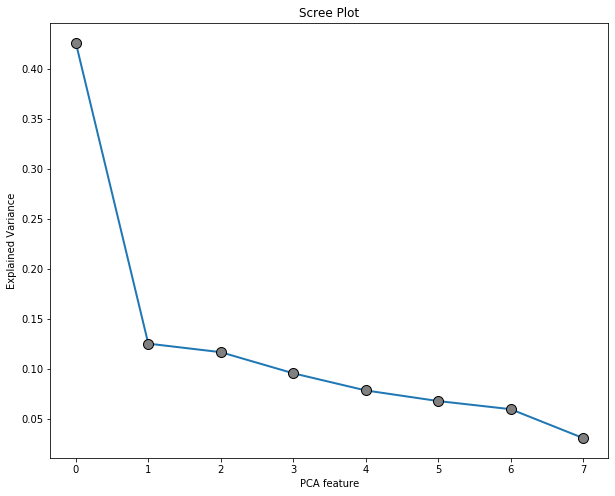

In [45]:
# Instantiate PCA
pca = PCA(n_components = None, random_state = 222)

# Fit and transform
survey_pca = pca.fit_transform(responders_scaled)

# Visualizing pca
scree_plot(pca_object = pca)

PCA 1 (variable 0) is explaining 45% of the entire dataset. This means it is an important PCA to reduce errors. The second component will work on what's left of the dataset, and make sure there is no correlation to the previous component. They don't go in the same direction in any given time.

Looking at our scree plot we can observe a clear drop and bending of the "elbow" at PCA 1 however, we see it continue to decrease. We ideally want a point where it is relatively flat. We can make some assumptions and say that the best cut of point for components would be at PCA 4, which would equal 5 components since it starts at 0.

# PCA - 5 Components (Limited)
Now we have determined the number of components we can build a new PCA model specifying 5 as the number of components allowed in our model. We can compare how both look in the next steps.

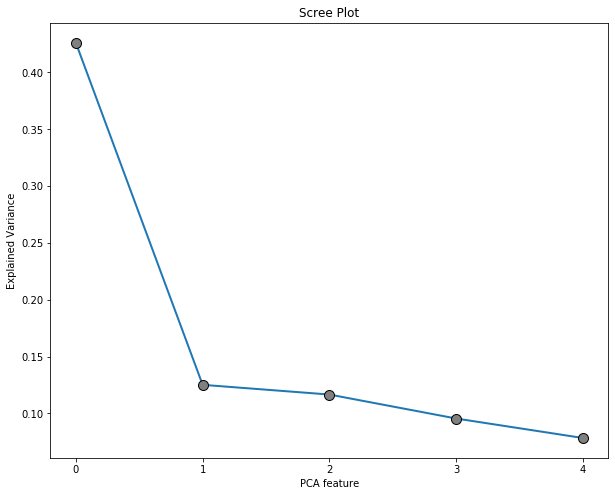

In [46]:
# Instantiate
pca_5_features = PCA(n_components = 5, random_state = 222)


# Fit and transform
surveys_pca_5_features = pca_5_features.fit_transform(responders_scaled)


# Visualizing pca
scree_plot(pca_object = pca_5_features)

# Factor Loading

Factor loading is a technique that is used to reduce a large number of variables into fewer numbers of factors.  This technique extracts maximum common variance from all variables and puts them into a common score. (Source: [Statistics Solution](https://www.statisticssolutions.com/factor-analysis-sem-factor-analysis/)). Using Factor loading we can get a better overview of our PCA results, and start thinking of next steps.

In [47]:
# dataframe for max limit components
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))

# convert the index from column names
factor_loadings = factor_loadings.set_index(responders_scaled.columns)


# dataframe for limited components
factor_loadings_5 = pd.DataFrame(pd.np.transpose(pca_5_features.components_))


# convert the index from column names
factor_loadings_5 = factor_loadings_5.set_index(responders_scaled.columns)

# Results
Now we can determine if there are any obvious personas in our data. If there are we would want to label them to make sure we understand the potential customers that would related to each of Big Five and Hult DNA results.

In [48]:
# # Factor loading results
# print(f"""
# Factor Loading - Max Component
# ------------------------------
# {factor_loadings.round(2)}
# """
# )

# print(f"""
# Factor Loading - 5 Components
# ------------------------------
# {factor_loadings_5.round(2)}
# """)

In [49]:
# # Factor loading results for 5 components
# factor_loadings_5.round(2)

We want to look at each of our PCAs and compare it to our traits and Hult DNA results. Using this information we can try build personas that make sense for potential groupings of customers. 

Since Factor loadings are correlation coefficients between observed variables and latent common factors (Source: [Sage](https://methods.sagepub.com/reference/encyc-of-research-design/n149.xml)) we can see if there are strong correlations compared to our common factors. Higher positive values, present a strong positive relationship, and high negative values present opposite effects. It is important we look at both positive and negative values to help determine appropriate assignments for our potential personas.

# Name Principal Components
We can name the results based on what similarities we see. When we observe the results, we can see that having a high value would mean they are generally more inclined to the stronger side of that trait. However, when we look at neuroticism it is the opposite. Individuals who score low in neuroticism tend to be more emotionally stable and less reactive to stress. They tend to be calm, even-tempered, and less likely to feel tense or rattled. Although they are low in negative emotion, they are not necessarily high on positive emotion. Being high in scores of positive emotion is generally an element of the independent trait of extraversion. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Neuroticism))

## User Personas
Using our result we defined 5 types of personas that would relate to our PCAs. Developing personas will give us more granular insights into who our customers are and potential insights on future customers. Each persona will carry unique characteristics that will embody both a Big Five trait and the Hult DNA group.

    
### PCA 0 - Aspiring Professionals:
    
While being positive in all of our aspects, the first persona has especially remarkable values in the Hult DNA questions compared to its peers. As the Hult DNA aims to develop mission-driven, globally aware professionals, this persona is named thereafter. Simultaneously, this group of people also shows extraversion, agreeableness, conscientiousness and openness, all of which are skills identified as a strong performing professional.
    
### PCA 1 -  Confident:
The "Confident" persona scores a strong negative score for neuroticism, and, as explained briefly before, this personality trait measures the emotional stability of a person. The characteristics of someone with such type of score is someone that can keep their calm under stress and are quite confident in decision making.

### PCA 2 - Introvert:

The introverts are well reserved individuals who prefer to spend time alone and avoid large groups. They have a hard time socializing as they are very private when it comes to sharing details about their life. They like to keep things in order, come prepared to school or work, are goal-driven, and persistent. They follow regular schedules and work hard to achieve their goals.

### PCA 3 - The Risk Averse:

In comparison to their peers, the risk averse persona finds it important to get along with others. These individuals are helpful, friendly, considerate, and generous. They are generally more closed-off, resistant to change, and analytical. They stick to the tried and true methods and are as such named thereafter. 

### PCA 4 - Self Reliant: (ADD)

In [50]:
# Naming each principal component
factor_loadings_5.columns = ["Aspiring Professionals", "Confident", 
                             "Introvert","The Risk Averse", "Self Reliant" ]

<center><h3> Factor Loading Results </h3></center>

group |Aspiring Professionals |Confident|Introvert|The Risk Averse |Self Reliant|
------|------|------|------|------|------|
extraversion|	0.239239|	0.238011	|-0.797871|	-0.129386|	0.455790|
agreeableness|	0.349362	|0.227192	|-0.045709	|0.615855|	-0.338560|
conscientiousness|	0.332470	|-0.392311|	0.395255|	0.056264|	0.583222|
neuroticism|	0.153660	|-0.826001	|-0.411765|	0.039746|	-0.347435|
openness	|0.356786|	0.116955	|0.117953|	-0.675684	|-0.379267|
thinking	|0.458497|	0.031757	|0.089709	|-0.269469	|0.005162|
team|	0.430280	|0.196215|	0.021179|	0.209964|	-0.182956|
communication	|0.404854|	-0.048598|	0.114571|	0.161211|	0.198573|

# Analyze Factor Loadings
Now we can evaluate how each of our PCA user personas relates to individual customers. This will help separate customers for targeting based on their traits. We can isolate users who are more heavy on one trait which will help our overall analysis in finding users with Windows computers, or who would purchase a Windows computer.

In [51]:
# Analyzing factor strengths per customer
X_pca_reduced = pca_5_features.transform(responders_scaled)

# Converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)

# Checking the results
X_pca_df.columns = factor_loadings_5.columns

# Potential Customer Segments
After defining the types of customers and personas we have a better understanding of groups based on similarities in the questions and answers they submitted. Diving deeper into customer segments, we can isolate specific groups within each persona and find what percentage they make up of the customer base. Having more targeted demographics can be an opportunity for Microsoft to explore in more detail.
     
PCAS:

 1. Aspiring Professionals
 2. Confident
 3. Introvert
 4. The Risk Averse
 5. Self Reliant
     
We can use our personas developed to find groups of customers that are meeting a certain threshold. The threshold we can set to find the groups will be 1 standard deviation above the mean. This will allow use to find users who are above the threshold and are more predominant in their PCA.

In [52]:
# # Find one std deviation more than the mean
# print(abs(X_pca_df['Aspiring Professionals'].mean())+X_pca_df['Aspiring Professionals'].std())

# # what percentage of people in this group are above 
# len(X_pca_df['Aspiring Professionals'][X_pca_df['Aspiring Professionals'] > 1.8]) / len(X_pca_df['Aspiring Professionals'])

In [53]:
# # Find one std deviation more than the mean
# print(abs(X_pca_df['Confident'].mean())+ X_pca_df['Confident'].std())

# # what percentage of people in this group are above 
# len(X_pca_df['Confident'][X_pca_df['Confident'] > 1]) / len(X_pca_df['Confident'])

In [54]:
# # Find one std deviation more than the mean
# print(abs(X_pca_df['Introvert'].mean())+X_pca_df['Introvert'].std())

# # what percentage of people in this group are above 
# len(X_pca_df['Introvert'][X_pca_df['Introvert'] > 1]) / len(X_pca_df['Introvert'])

In [55]:
# # Find one std deviation more than the mean
# print(abs(X_pca_df['The Risk Averse'].mean())+X_pca_df['The Risk Averse'].std())

# # what percentage of people in this group are above 
# len(X_pca_df['The Risk Averse'][X_pca_df['The Risk Averse'] > 0.9]) / len(X_pca_df['The Risk Averse'])

In [56]:
# # Find one std deviation more than the mean
# print(abs(X_pca_df['Self Reliant'].mean())+X_pca_df['Self Reliant'].std())

# # what percentage of people in this group are above 
# len(X_pca_df['Self Reliant'][X_pca_df['Self Reliant'] > 0.8]) / len(X_pca_df['Self Reliant'])

### Insights:
Below are thresholds we can explore more for potential customer segments based on the PCAs, we will use this later in our analysis.

- About 18% (71 users) of the PCA Aspiring Professional meet the established threshold
- About 17% (67 users) of the PCA Confident meet the established threshold
- About 17% (67 users) of the PCA Introvert meet the established threshold
- About 13% (51 users) of the PCA The Risk Averse meet the established threshold
- About 15% (59 users) of the PCA Self Reliant meet the established threshold

-----------------------------------------

# 6. CLUSTERING
Now we want to find the types of clusters, and compare them to the PCA results. 

Clustering is when we divide the data points into different groups. The process of clustering tries to group data points based on similarities or differences. Using the clustering method we look for "clumps" of data piling up together, which would essentially provide a single cluster. Data points which are on the border of 2 clusters would lie somewhere in between, and will illustrate the similarities it has to both clusters.

It is basically a collection of objects on the basis of similarity and dissimilarity between them. (Source: [Geeks4Geeks](https://www.geeksforgeeks.org/clustering-in-machine-learning/))

## Scale the PCA data
We will need to rescale the PCA dataframe, because the variances are not aligned. Before we cluster we need to ensure that the variance's after scaling are consistent. We will conduct the same scaling process below we did earlier but this time use the new PCA dataframe.

In [57]:
# Instantiate
scaler = StandardScaler()

# Fit scaler 
scaler.fit(X_pca_df)

# Transform 
scaled_pca = scaler.transform(X_pca_df)

# Convert to dataframe
pca_scaled = pd.DataFrame(scaled_pca)

# Match the column names
pca_scaled.columns = factor_loadings_5.columns

## Agglomerative / Hierarchical Clustering
Hierarchical clustering algorithms group similar objects into groups called clusters.Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. (Source: [Towards Data Science](https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019))

There are 3 types of Agglomerative clustering:

   1. ward - tries to focus grouping in a way to reduce variance in each cluster. This is the default method used. The end result has cluster in similar sizes.

   2. average - groups clusters that are similar with their average distance between points.

   3. complete - merges clusters that have the smallest maximum distance

In [58]:
# # Aglo clusters
# # grouping data based on Ward distance
# agglo_clusters = linkage(y = pca_scaled,
#                                  method = 'ward')

# # set plot size
# plt.figure(figsize=(12, 8))

# # graph dendrogram
# dendrogram(Z = agglo_clusters)

# # dislay plot
# plt.show()

If we were to display the full plot we would see the dendrogram produced a lot of clusters. Because there are too many clusters to analyze we can proceed to the next step which is to use the interia plot formula we defined earlier and determine the point of convergence.

## Intertia Plot

Inertia: Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up. (Source: [Towards Data Science](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a)).

We can use a similar method we did earlier with the PCAs, where we look for the elbow cut off point where the numbers start to converge.

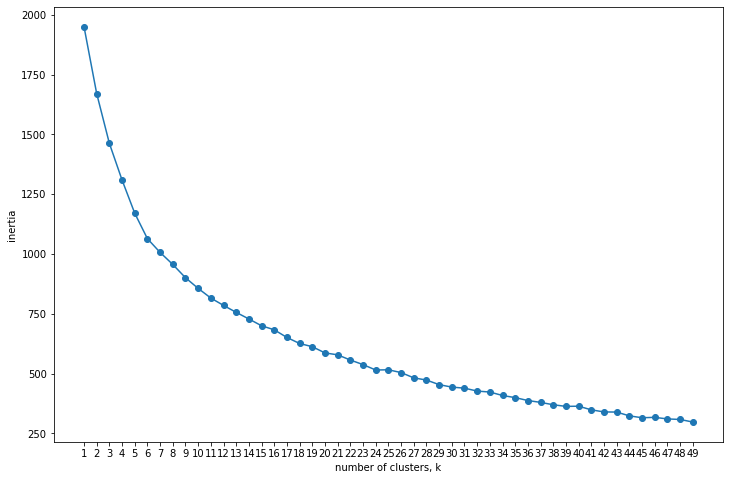

In [59]:
# Intertia Plot
interia_plot(data = pca_scaled)

## Cluster Testing
We can experiment the number of cluster based on the inertia plot above. We look for the point where the line starts to converge. Looking at the initial plot we see it converge around 6 or 7. The number of clusters does not need to represent the same as the number of components we selected earlier in the PCA example.

In [60]:
# Instantiating a k-Means object with seven clusters
k_pca_responders = KMeans(n_clusters = 7,
                          random_state = 802)

# Fitting the object to the data
k_pca_responders.fit(pca_scaled)

# Converting the clusters to a DataFrame
kmeans_pca_responders = pd.DataFrame({'Cluster': k_pca_responders.labels_})

In [61]:
# # Checking the results
# print("Groups of Clusters")
# print("------------------")
# print(kmeans_pca_responders.iloc[: , 0].value_counts())


<center>Cluster Distribution</center>

Cluster Number | Number of Participants in Clusters |
---|----|
1  |  87|
0   | 68|
2   | 66|
4   | 52|
3   | 46|
6   | 45|
5   | 26|

We observe our results there is a relatively even distribution of survey results in each cluster with each cluster gradually getting more populated. There is no significant jump in the amount of data points in a cluster which is good. We can explore this in the following steps on how the clusters impact our other results.

## Centroid (Means) for Clusters
The centroids will be the center of each cluster we have developed. All the data points within the cluster will be centered around it.

Using sklearn's formula we can determine the centroids for our scaled PCA results. 
Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels. (Source: [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) Since we will not be outputted with labels we will want to make sure we add back the labels we choose from the factor_loading stage.

In [62]:
# Storing cluster centers
centroids_pca = k_pca_responders.cluster_centers_

# Converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

# Renaming principal components
centroids_pca_df.columns = factor_loadings_5.columns

# Checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Aspiring Professionals,Confident,Introvert,The Risk Averse,Self Reliant
0,-0.59,-1.01,0.09,0.80,0.55
1,1.54,0.46,0.01,-0.50,0.87
2,-1.13,0.55,-0.28,-0.74,0.52
3,-0.14,1.07,1.05,0.47,-0.05
4,0.27,-0.75,1.12,-0.51,-0.95
5,0.14,0.55,-0.73,0.92,-0.95
6,0.36,-0.40,-0.89,-0.45,0.01


## Name Clusters
We can continue our profiling by developing names for our clusters to see if we can go more specific in the clusters we have.

### Adventurous: 
This cluster is identified by the following combination of PCA personalities we identified.
Very low in aspiration for professionalism, indicating that climbing the corporate ladder and creating a career professionally is not a priority for these people. While being moderately confident, this cluster is rather introverted with a medium low score for introvertism. They tolerate risk and even seem to have no problem with seeking it, indicated by the moderately low score for risk aversion.
This cluster also consists of people who are relatively high in self reliance. This means they are confident enough in their skills and take action relying on only themselves.

### Team Player:
This cluster is mainly characterized by two extreme personality types: High introvertism and very low self reliance. These persons need a team around them to rely on and ultimately help themselves to perform at their best. Even though they are not extroverted, they don’t shy the risk, making them the undercover risk seeker within group dynamics. This is indicated by the low score of risk aversion. They also are only slightly elevated within the aspiring professionals trait, making it seem like they enjoy it more to be in the background and fulfilling supportive roles.

### Conservatives:
This cluster is defined by having very high ambitions to become an aspiring professional. They are aiming to be exactly that by fulfilling very conservative traits of personality. Being characterized by moving within the moderate areas of every personality group, they are rather low in confidence but still extroverted potentially because they realize that to become successful they need to get awareness. They are moderately risk averse as it fits in with being conservative but rely on themselves in a moderate way. They seem to go the common road on those traits.

### Self Starters:
The students in this cluster rely on others and bring high confidence to the team they are working with. Even though they are moderately high in introvertism, they do not lack the confidence. It seems as if they like to push their ideas into a team environment to mitigate the risk as they are characterized by being rather risk averse. These students seem to be more or less indifferent about focusing on their careers or rather living a laissez faire life, but enjoy starting the conversations about specific topics.

### Traditionalists:
These students like to keep to themselves. They are low in confidence and high in introvertism, resulting in a high level of self reliance. Traditionally, they are tackling problems on their own but barely taking risks, as they are relatively high in risk aversion. They do not have aspirations for their professional future and seem to enjoy working with what they are used to. This cluster likes it’s own traditions and it seems like it barely moves away from them.

### Leaders:
The leaders cluster is mainly characterized by being very open to risk. They do not fear any potential damages and combined with their confidence, like to tackle them on their own. These people believe in themselves and their ability almost all the time and regardless of the situation they find themselves in. They have aspirations for their career and try to fulfill them by taking risks and going for the big shots instead of a steady approach. Being neutral in introvertism/extrovertism makes it seem like they adapt to situations.

### Small Community:
The students in this cluster love social contact and being in the center of social dynamics. This is represented by the high extrovertism. They also do not rely on themselves when tackling tasks but rather make it a team effort. They also don’t seem to put a big importance on their professional aspirations compared to being socially acknowledged. The moderately low score in risk aversion shows that they don’t seek the risk but are fine with taking them once in a while.



In [63]:
# Cluster
cluster = ['Traditionalists', 'Adventurous', 'Conservatives', 'Team Player', 
           'Small Community', 'Leaders', 'Self Starter']

# Assigning cluster object 
centroids_pca_df.index = cluster
# centroids_pca_df.round(2)


Clusters | Aspiring Professionals	|Confident	|Introvert	|The Risk Averse	|Self Reliant|
---------|---------------|-----------|-----------|-------------------|------------|
Traditionalists	|-0.58	|-0.75|	0.43|	0.86	|0.42|
Adventurous|	-0.81	|-0.08|	-0.58|	-0.63	|0.40|
Conservatives	|1.10|	-0.57|	-0.50|	0.13|	0.24|
Team Player|	0.24	|-0.57|	1.16	|-0.63|	-1.16|
Small Community|	0.09	|0.66|	-0.87	|0.56|	-1.08|
Leaders|	0.82	|1.27	|-0.10	|-1.36|	0.69|
Self Starter|	0.00|	1.23	|1.06|	0.52|	0.27|

In [64]:
# Renaming regions
cluster_names = {0 : 'Traditionalists',
                 1 : 'Adventurous',
                 2 : 'Conservatives',
                 3 : 'Team Player',
                 4 : 'Small Community',
                 5 : 'Leaders',
                 6 : "Self Starter"
                }

# Saving new cluster namesS
kmeans_pca_responders['Cluster'].replace(cluster_names, inplace = True)

# 7. RESULTS
Now that we have our PCA components, and our clusters we can merge back our demographic information to observe the results.

We will reference our demographics once again to index the necessary columns and concatenate the results.

In [65]:
# Store demographics in a list
demographic_questions = ['What laptop do you currently have?',
                         'What laptop would you buy in next assuming if all laptops cost the same?',
                         'What program are you in?',
                         'What is your age?',
                         'Gender',
                         'nationality',
                         'Regions'
                        ]

# Concat clusters with the PCA dataframe
cluster_pca = pd.concat([kmeans_pca_responders,
                         X_pca_df],
                         axis = 1)


# Concatenating demographic information with pca-clusters
final_df = pd.concat([survey_df.loc[ : , demographic_questions],
                     cluster_pca],
                     axis = 1)
# Checking the results
# final_df.head()

We now have a complete dataframe of our original demographics and the PCAs based on the Big Five traits, and the clustering we developed using KMeans. Using this information we have can easily compare the results we achieved with the demographics, and continue our exploration. 

---------------------


# Continued Exploration - Explore Window Laptop Purchases
Now that we have our demographic data available next to our clusters and PCAs we can continue to explore the results and see if there is anything interesting that stands out about the groupings.

## Current Owners vs Future Owners
We can observe below which PCAs and Clusters are current owners of Laptops, and narrow down a targeted demographic.

## PCAs - Laptop Ownership
We can use this information to isolate a very specific set of customers. Using this information we can study consumer behaviour and purchasing patterns to understand the ideal Windows laptop customer. Combining both current windows owners and users that are above our average we can see the following target groups below.

In [66]:
# # Current ownership
# # aspiring professionals proportion
# print("Aspiring Professional - Above Average:")
# print((final_df[(final_df['Aspiring Professionals'] >1.8) & (final_df["What laptop do you currently have?"]=='Windows laptop')]['Cluster'].count()/final_df['Cluster'].count()).round(2))

# # confident proportion
# print("Confident - Above Average:")
# print((final_df[(final_df['Confident'] > 1) & (final_df["What laptop do you currently have?"]=='Windows laptop')]['Cluster'].count()/final_df['Cluster'].count()).round(2))

# # introvert proportion
# print("Introvert - Above Average:")
# print((final_df[(final_df['Introvert'] > 1) & (final_df["What laptop do you currently have?"]=='Windows laptop')]['Cluster'].count()/final_df['Cluster'].count()).round(2))

# # risk averse proportion
# print("The Risk Averse - Above Average:")
# print((final_df[(final_df['The Risk Averse'] > 0.9) & (final_df["What laptop do you currently have?"]=='Windows laptop')]['Cluster'].count()/final_df['Cluster'].count()).round(2))

# # self reliant proportion
# print("Self Reliant - Above Average:")
# print((final_df[(final_df['Self Reliant'] > 0.8) & (final_df["What laptop do you currently have?"]=='Windows laptop')]['Cluster'].count()/final_df['Cluster'].count()).round(2))

In [67]:
# # Next purchase
# # aspiring professionals proportion
# print("Aspiring Professional - Above Average:")
# print((final_df[(final_df['Aspiring Professionals'] >1.8) & (final_df["What laptop would you buy in next assuming if all laptops cost the same?"]=='Windows laptop')]['Cluster'].count()/final_df['Cluster'].count()).round(2))

# # confident proportion
# print("Confident - Above Average:")
# print((final_df[(final_df['Confident'] > 1) & (final_df["What laptop would you buy in next assuming if all laptops cost the same?"]=='Windows laptop')]['Cluster'].count()/final_df['Cluster'].count()).round(2))

# # introvert proportion
# print("Introvert - Above Average:")
# print((final_df[(final_df['Introvert'] > 1) & (final_df["What laptop would you buy in next assuming if all laptops cost the same?"]=='Windows laptop')]['Cluster'].count()/final_df['Cluster'].count()).round(2))

# # risk averse proportion
# print("The Risk Averse - Above Average:")
# print((final_df[(final_df['The Risk Averse'] > 0.9) & (final_df["What laptop would you buy in next assuming if all laptops cost the same?"]=='Windows laptop')]['Cluster'].count()/final_df['Cluster'].count()).round(2))

# # self reliant proportion
# print("Self Reliant - Above Average:")
# print((final_df[(final_df['Self Reliant'] > 0.8) & (final_df["What laptop would you buy in next assuming if all laptops cost the same?"]=='Windows laptop')]['Cluster'].count()/final_df['Cluster'].count()).round(2))

<center>PCA Current Windows Owner (Above Average)</center>

PCA | Number of Participants | % of Users |
----|-------------------------------|------------|
Aspiring Professionals | 29  | 7% |
Confident | 32 |  8%  |
Introvert | 32 | 8%|
The Risk Averse| 24  | 6% |
Self Reliant | 20 | 5% |

Now we see the types of users that are more predominantly one type of our personas, basing on our thresholds we can explore what changes are there when they are given the opportunity to change their laptops. If we run our analysis, and look at how users changed their future preferences we see the following.

<center>PCA, Future Windows Owner (Above Average)</center>

PCA | Number of Participants | % of Users |
----|-------------------------------|------------|
Aspiring Professionals | 21  | 5% |
Confident | 23 |  6%  |
Introvert | 24 | 7%|
The Risk Averse| 18  | 4% |
Self Reliant | 17 | 4% |

We can see from the result very specific size customer segments who are interested in either continuing to own a Windows laptop, or will switch from a Macbook in their next laptop. These are strong users who are favored to a persona and want to own a Windows laptop. Using these demographic targeting, we can again find a unique customer segment, and study user patterns and behavior.

 - For Aspiring Professional we see a drop from 29 users to 21 users owning Windows
 - For Confident we see a drop from 32 users to 23 users owning Windows
 - For Introvert we see a drop from 32 users to 24 users owning Windows
 - For The Risk Averse we see a drop from 24 users to 18 users owning Windows
 - For Confident we see a drop from 20 users to 17 users owning Windows

It seems that there is a consistent drop in the customers that are more isolated into one persona look to change into a Macbook. Using this information we may want to look into ways to targeting customers who are more evenly spread out in personas.

In [68]:
# # Checking changes in user personas
# final_df[(final_df['Self Reliant'] > 0.8) & (final_df["What laptop do you currently have?"]=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()

---------------------

## Clustering - Laptop Ownership
Next, we can explore how the effects of the clusters related to current and future Windows laptop owners. Below we see two tables with the results.

In [69]:
# # Finding how much percentage of a cluster owns a windows

# print("Cluster 1:")
# print((final_df[(final_df['Cluster']=='Traditionalists')&(final_df['What laptop do you currently have?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Traditionalists')]['Cluster'].count()).round(2))

# # finding how much percentage of a cluster owns a windows

# print("Cluster 2:")
# print((final_df[(final_df['Cluster']=='Adventurous')&(final_df['What laptop do you currently have?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Adventurous')]['Cluster'].count()).round(2))

# # finding how much percentage of a cluster owns a windows

# print("Cluster 3:")
# print((final_df[(final_df['Cluster']=='Conservatives')&(final_df['What laptop do you currently have?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Conservatives')]['Cluster'].count()).round(2))

# # finding how much percentage of a cluster owns a windows

# print("Cluster 4:")
# print((final_df[(final_df['Cluster']=='Team Player')&(final_df['What laptop do you currently have?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Team Player')]['Cluster'].count()).round(2))


# # finding how much percentage of a cluster owns a windows

# print("Cluster 5:")
# print((final_df[(final_df['Cluster']=='Small Community')&(final_df['What laptop do you currently have?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Small Community')]['Cluster'].count()).round(2))

# # finding how much percentage of a cluster owns a windows

# print("Cluster 6:")
# print((final_df[(final_df['Cluster']=='Leaders')&(final_df['What laptop do you currently have?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Leaders')]['Cluster'].count()).round(2))



# # finding how much percentage of a cluster owns a windows
# print("Cluster 7:")
# print((final_df[(final_df['Cluster']=="Self Starter")&(final_df['What laptop do you currently have?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=="Self Starter")]['Cluster'].count()).round(2))

In [70]:
# final_df[(final_df['Cluster']=='Self Starter')].count()

In [71]:
# # Finding how much percentage of a cluster owns a windows

# print("Cluster 1:")
# print((final_df[(final_df['Cluster']=='Traditionalists')&(final_df['What laptop would you buy in next assuming if all laptops cost the same?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Traditionalists')]['Cluster'].count()).round(2))

# # finding how much percentage of a cluster owns a windows

# print("Cluster 2:")
# print((final_df[(final_df['Cluster']=='Adventurous')&(final_df['What laptop would you buy in next assuming if all laptops cost the same?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Adventurous')]['Cluster'].count()).round(2))

# # finding how much percentage of a cluster owns a windows

# print("Cluster 3:")
# print((final_df[(final_df['Cluster']=='Conservatives')&(final_df['What laptop would you buy in next assuming if all laptops cost the same?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Conservatives')]['Cluster'].count()).round(2))

# # finding how much percentage of a cluster owns a windows

# print("Cluster 4:")
# print((final_df[(final_df['Cluster']=='Team Player')&(final_df['What laptop would you buy in next assuming if all laptops cost the same?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Team Player')]['Cluster'].count()).round(2))


# # finding how much percentage of a cluster owns a windows

# print("Cluster 5:")
# print((final_df[(final_df['Cluster']=='Small Community')&(final_df['What laptop do you currently have?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Small Community')]['Cluster'].count()).round(2))

# # finding how much percentage of a cluster owns a windows

# print("Cluster 6:")
# print((final_df[(final_df['Cluster']=='Leaders')&(final_df['What laptop would you buy in next assuming if all laptops cost the same?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=='Leaders')]['Cluster'].count()).round(2))



# # finding how much percentage of a cluster owns a windows
# print("Cluster 7:")
# print((final_df[(final_df['Cluster']=="Self Starter")&(final_df['What laptop would you buy in next assuming if all laptops cost the same?'] == 'Windows laptop')]['Cluster'].count()/final_df[(final_df['Cluster']=="Self Starter")]['Cluster'].count()).round(2))

<center>Clusters of CURRENT Laptop Ownership</center>

Cluster | Cluster Size | % of Windows | % of Not Windows |
----|--------------|--------------|------------|
Traditionalists | 68 | 51% |49%|
Adventurous | 87  | 44% | 56%
Conservatives| 66 | 44% | 56% |
Team Player| 46  | 59% | 31% |
Small Community| 51  | 52% | 48% |
Leaders| 26  | 38% | 62% |
Self Starter| 44  | 51% | 49%|

Getting a general overview of what percentage of customers own Windows Vs Not Windows (Macbook & Chromebook), we can see that Team Player, Small Community, Self Starters, and Traditionalists, all have slightly more ownership for Windows laptops. The splits are not very large, but it is good to see that Windows laptops majority favored amongst the clusters. Now let's look into NEXT ownership for laptops.

<center>Clusters of NEXT Laptop Ownership </center>

Cluster | Cluster Size | % of Windows | % of Not Windows |
----|--------------|--------------|------------|
Traditionalists | 68 | 40% |60%|
Adventurous | 87  | 45% | 55%
Conservatives| 66 | 36% | 64% |
Team Player| 46  | 52% | 48% |
Small Community| 51  | 52% | 48% |
Leaders| 26  | 31% | 69% |
Self Starter| 44  | 38% | 62%|

Now the results have changed pretty drastically. We see that almost all the clusters that had more Windows users in the previous table have now convert into becoming Non Windows users. This is a significant change, now that Windows has lost market share amongst their customers, they would want to start explore reasons specific to each group as to why this happened.

The only positive change in the clustering, was the Adventurous had a growth of 1%, which may be a reason to look into they customers in this bracket. There may be opportunity to study behavior and patterns amongst these demographics. 

In [72]:
# # Create barplots for each type pca persona
# fig, ax = plt.subplots(figsize = (10, 8))
# sns.set_palette(sns.color_palette("hls", 8))

# plt.subplot(2, 2, 1)
# sns.boxplot(x = 'What laptop do you currently have?',
#             y = 'Aspiring Professionals',
#             hue = 'Cluster',
#             data = final_df)

# plt.subplot(2, 2, 2)
# sns.boxplot(x = 'What laptop do you currently have?',
#             y = 'Confident',
#             hue = 'Cluster',
#             data = final_df)


# plt.subplot(2, 2, 3)
# sns.boxplot(x = 'What laptop do you currently have?',
#             y = 'Introvert',
#             hue = 'Cluster',
#             data = final_df)


# plt.subplot(2, 2, 4)
# sns.boxplot(x = 'What laptop do you currently have?',
#             y = 'The Risk Averse',
#             hue = 'Cluster',
#             data = final_df)


# plt.tight_layout()


----------------
## Program

There are currently 192 windows laptops among 392 participants and if they could switch to a new one, this number would be reduced to 163 meaning a reduction in 15%. This is the detail behind the 15% reduction.
   
- Only 147 would purchase another windows laptop, meaning that Microsoft would lose 23% of its current customers. Of which 65.3% are male and 34.7% female.
- Only 16 users would switch from a MacBook to a windows laptop, meaning an increase in 8% from the base number. Of which 62.5% are male and 37.5% female.

Considering the laptop ownership by program and what kind of laptop they would switch to, we know that 49% of the students have a windows laptop into the four different programs. The following table shows the changes in windows laptop ownership if all students would change laptop.
- DD in Disruptive innovation would have a windows user among the participant students for the first time.
- The percentages shown represent by how much the number of users would drop after considering the users that left windows and the users that would start using it.
- MIB_MBAN despite being the program with the most new users (8 students or 10.5% from 76 students initially), it is also the most affected, losing 23 students (30.3% from 76 students initially).

Program | Students with Windows Laptop | Remain loyal to Windows | New users | Change in % |
-----|-----|----|-----|-----|
DD (MIB & Business Analytics) | 76 | 53 | 8 | 19.7% |
One year Business Analytics | 61 | 49 | 5 | 11.5% |
DD (MBA & Business Analytics) | 55 | 45 | 1 | 16.4% |


In [73]:
# # Code for program analysis
# # Studients carrying over to Windows ot not
# w2w_bp  = survey_df['What program are you in?']\
#           [survey_df['What laptop do you currently have?']\
#           == "Windows laptop"]\
#           [survey_df['What laptop would you buy in next assuming if all laptops cost the same?']\
#           == 'Windows laptop']\
# .value_counts()
# w2nw_bp = survey_df['What program are you in?']\
#           [survey_df['What laptop do you currently have?']\
#           != "Windows laptop"]\
#           [survey_df['What laptop would you buy in next assuming if all laptops cost the same?']\
#           == 'Windows laptop']\
# [survey_df['Gender'] == 'Male'].value_counts()
# print(f"""
# {w2w_bp}
# ---------------------
# {w2nw_bp}
# """)
# # Student carrying over by gender
# w2w_bp_m = survey_df['What program are you in?']\
#           [survey_df['What laptop do you currently have?']\
#           == "Windows laptop"]\
#           [survey_df['What laptop would you buy in next assuming if all laptops cost the same?']\
#           == 'Windows laptop']\
#           [survey_df['Gender'] == 'Male'].value_counts()
# w2w_bp_f = survey_df['What program are you in?']\
#           [survey_df['What laptop do you currently have?']\
#           == "Windows laptop"]\
#           [survey_df['What laptop would you buy in next assuming if all laptops cost the same?']\
#           == 'Windows laptop']\
#           [survey_df['Gender'] == 'Female'].value_counts()
# print(f"""
# {w2w_bp_m}
# ---------------------
# {w2w_bp_f}
# """)
# # New students by gender
# w2nw_bp_m = survey_df['What program are you in?']\
#           [survey_df['What laptop do you currently have?']\
#           != "Windows laptop"]\
#           [survey_df['What laptop would you buy in next assuming if all laptops cost the same?']\
#           == 'Windows laptop']\
#           [survey_df['Gender'] == 'Male'].value_counts()
# w2nw_bp_f = survey_df['What program are you in?']\
#           [survey_df['What laptop do you currently have?']\
#           != "Windows laptop"]\
#           [survey_df['What laptop would you buy in next assuming if all laptops cost the same?']\
#           == 'Windows laptop']\
#           [survey_df['Gender'] == 'Female'].value_counts()
# print(f"""
# {w2nw_bp_m}
# ---------------------
# {w2nw_bp_f}
# """)

-------------------------
## Region
Next, we can explore the impact on clusters on regions and see what the current and future demand for Windows laptops looks like.

In [74]:
# # Data frame with selected columns of interest
# region_final = final_df.iloc[:,[6,7,8,9,10,11,12]]

# #view new dataframe
# #print(region_final.head())

In [75]:
# # New region dataframe
# Africa = region_final[region_final['Regions']=='Africa']
# Europe = region_final[region_final['Regions']=='Europe']

# # looking at cluster distribution
# print(Africa['Cluster'].value_counts())
# print(Europe['Cluster'].value_counts())

# # count total cluster per gender
# print(Africa['Cluster'].count())
# print(Europe['Cluster'].count())

In [76]:
# # Distribution of Africa
# # distribution of window owned for Traditionalists'
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Traditionalists')]['What laptop do you currently have?'].value_counts())


# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Traditionalists')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())


# # distribution of window owned for Adventurous
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Adventurous')]['What laptop do you currently have?'].value_counts())

# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Adventurous')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())


# # distribution of window owned for Conservatives
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Conservatives')]['What laptop do you currently have?'].value_counts())


# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Conservatives')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())

# # distribution of window owned for Team Player
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Team Player')]['What laptop do you currently have?'].value_counts())


# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Team Player')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())


# # distribution of window owned for Small Community
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Small Community')]['What laptop do you currently have?'].value_counts())


# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Small Community')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())

# # distribution of window owned for Leaders
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Leaders')]['What laptop do you currently have?'].value_counts())


# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Leaders')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())


# # distribution of window owned for Self Starter
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Self Starter')]['What laptop do you currently have?'].value_counts())

# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Africa') 
#          & (final_df['Cluster']=='Self Starter')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())






In [77]:
# # Distribution of Europe
# # distribution of window owned for Traditionalists'
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Traditionalists')]['What laptop do you currently have?'].value_counts())


# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Traditionalists')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())




# # distribution of window owned for Adventurous
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Adventurous')]['What laptop do you currently have?'].value_counts())



# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Adventurous')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())



# # distribution of window owned for Conservatives
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Conservatives')]['What laptop do you currently have?'].value_counts())


# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Conservatives')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())



# # distribution of window owned for Team Player
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Team Player')]['What laptop do you currently have?'].value_counts())


# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Team Player')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())




# # distribution of window owned for Small Community
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Small Community')]['What laptop do you currently have?'].value_counts())



# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Small Community')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())



# # distribution of window owned for Leaders
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Leaders')]['What laptop do you currently have?'].value_counts())



# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Leaders')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())




# # distribution of window owned for Self Starter
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Self Starter')]['What laptop do you currently have?'].value_counts())

# # narrow down selection for unique customers 
# print(final_df[(final_df['Regions'] == 'Europe') 
#          & (final_df['Cluster']=='Self Starter')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())





Exploring the distribution of clusters within Europe and Africa provided further insights:

Region Type | Size | Traditionalists | Adventurous | Conservatives | Team Player | Small Community | Leaders |Self Starter
----|--------------|--------------|------------|--------------|------------|--------------|------------|--------------|
Europe | 62 | 14.5% | 21%| 21% | 11.3% | 8.1%| 14.5% | 9.7% |
Africa | 28  | 17.9% | 25% | 17.9% | 7.1% | 10.7%| 7.1% | 14.3% |



- For all the clusters in Europe, all responders who earlier owned a Windows laptop (39%) choose to stick to with Windows laptop as their next choice as well. 


- For Conservatives, Team Player, Small Community and Leaders in Africa, the responders stuck to their choice of Windows laptop that they currently own. 

-------------------
## Age

Exploring the distribution of clusters within the specific age sets of Gen Z and Gen Y provided further insights:

Gen Type | Size | Adventurous | Team Player | Conservatives | Self Starter | Traditionalists | Leaders |Small Community
----|--------------|--------------|------------|--------------|------------|--------------|------------|--------------|
Gen Z | 59 | 15.2% | 15.2%| 15.2% | 15.2% | 15.2%| 7% | 17% |
Gen Y | 331  | 9% | 13% | 15% | 20% | 17%| 14% | 12% |



- The highest cluster in Gen Y of about 20% is the self starter cluster, which is characterized by them relying on others and bringing high confidence to the team they are working with even though they are moderately high in introvertism. This group had 62% of their responders not wanting a windows as their next laptop and as such do not confirm the earlier hypotheses of Macbook users scoring high on extraversion. 


- The second highest cluster in Gen Y of about 17% is the traditionalists cluster. This group is low in confidence and high in introvertism, resulting in a high level of self reliance. Traditionally, they are tackling problems on their own but barely taking risks, as they are relatively high in risk aversion. This group had 40% of their responders wanting a Windows laptop next. This partially confirms the hypotheses of Windows users scoring low in thinking by avoiding challenging situations that working in teams bring about.  



-----------------
## Gender
Now we can explore how the clusters impact gender roles amongst our survey responders.

In [78]:
# # Data frame with selected columns of interest
# gender_final = final_df.iloc[:,[4,7,8,9,10,11,12]]

# #view new dataframe
# print(gender_final.head())

# # new gender dataframe
# male = gender_final[gender_final['Gender']=='Male']
# female = gender_final[gender_final['Gender']!='Male']

# # looking at cluster distribution
# print(male['Cluster'].value_counts())
# print(female['Cluster'].value_counts())
# print(male['Cluster'].count())
# print(female['Cluster'].count())

# # distribution of window owned for Adventurous
# final_df[(final_df['Gender'] == 'Male') 
#         & (final_df['Cluster']=='Adventurous')]['What laptop do you currently have?'].value_counts()

# # narrow down selection for unique customers 
# final_df[(final_df['Gender'] == 'Male') 
#          & (final_df['Cluster']=='Adventurous')
#          & (final_df['What laptop do you currently have?']=='Windows laptop')]['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()



Clusters        | Male (% of Population) | Female (% of Population) |
----------------------|---------|--------|
Adventurous            |57 (25%) |30 (18%)|
Traditionalists           |38 (17%) |30 (18%)|
Conservatives         |38 (17%) |28 (17%)|
Small Community       |26 (12%) |26 (16%)|
Team Player          |26 (12%) |20 (12%)|
Self Starter       |25 (11%) |20 (12%)|
Leaders               |14 (6%)  |12  (7%)|
TOTAL GENDER          | 224      | 166 |

Looking at the distribution of male and female survey responders based on the cluster allocation, we see that there is a relatively similar proportion of clients in both genders. The one exception is male population have a higher presence in the Adventurous cluster. We remember in our clustering analysis Adventurous had the most consistent change in Windows users. It was the only cluster with a growth in future users. We can explore this further by isolating males in the Adventurous and observe what laptops they use.

Male - Adventurous

    Macbook           29
    Windows laptop    28

We see a even split of ownership so we can't derive too much insight on this. We can however, study the patterns, and behaviours of the Male - Adventurous - Window users and see what laptop they would buy next. From the 28 Windows owned males we see the below.

    Windows laptop    26
    Macbook            2
    
These are positive results. It looks like only 2 users would be switching out of a Windows to a Macbook. Now we have a unique demographic of high valued users. 26 total males, that can be targeted for insight development and opportunity analysis. 26 users equal to 6% of our responders, which may seem small, but these users are the most active and loyal based on clustering and demographics. We would to ensure we have marketing strategies that would attract them to be used for future campaigns.

--------------------
# 8. OVERVIEW

Finally, after exploring demographic trends within our responders, and learning more about laptop preference we can see how the effects of Big Five personality traits and Hult DNA groupings define preference. Exploring the results of our PCAs and Cluster analysis provide insights into unique customer segments, and showcases the impact of Windows demand over time and characteristics.

## Main Insights

### Insight 1
There was an even split for both Macbook and Windows laptops; 51% of audience size for Macbook and 49% for Windows. However, there was a 7% drop; 4.9% to Macbook and the rest to Chromebook, in future laptop ownerships for Windows. In grouping the age for further analysis, Gen Z preferred purchasing a Macbook (75%: 45 users). The Windows proportion for Gen Y, declined by 9% from 53%, totaling 30 users, which is a significant drop in interest from their older customers. This indicates an overall loss in market share for Windows if laptops are the same price.

### Insight 2
Focusing on South America, there is a clear distinction in their laptop ownership. Looking at Windows laptop preference, for South America, 69% (35 users) favor a Windows laptop. Macbook prices in South America are some of the highest rates in comparison to other countries, which could be a big reason Windows computers are preferred (Nottrodt, 2020). However, despite the apparent higher prices in South America, when asked what would be their ideal next laptop, there is a decline in Windows users, falling from 69% to 52%, totaling 8 users. 

### Insight 3
Comparing the regions, we analyzed vs. the top 5 nationalities surveyed, we found:
 - All regions except Europe lose interest in Windows by an average 11%.
 - We observed Chinese, German and American students increase interest by an average of 13%.
 
Considering these factors, there is an opportunity to explore more and find final conclusions for marketing opportunities:
 - This could mean that highly educated people, in the countries mentioned above, see benefits in using Windows.
 - International students could be an interesting market for Microsoft to target.
 - Young professionals may see an added value to buying Windows early on their careers.

------------------------

## Additional Insights

### Insight 4
Focusing on genders currently, 55% (125 users) of males own a Windows, compared to 41% of females. However, looking at how males respond to their next laptop preference, males ownership of Windows laptops drop by 8% (31 users), Macbook increases by 5% (20 users), and some switch their preference to Chromebooks (12 users). There is an evident decline in male's Windows laptop preference. In comparison, females' preference Macbooks stays consistent, seeing growth in current ownership to future ownership from 59% (97 users) to 63% (104 users).

### Insight 5
Although the users from the African region only accounted for 7% (28 users) of the dataset, they had large changes in laptop preference. Current ownership for Windows laptops with African users is 43%, but when asked what they preferred for their next laptop, the proportion dropped by 15%. The total percentage of Windows laptop ownership for users from the African region dropped to 29%. We can stipulate that consumers are more interested in Macbooks if given a choice for their next laptop.

---------------------------

## Recommendation

As demand for Windows laptops generally seems to decrease for US students, the demand for some of the international students is still increasing. Additionally, the number of international students in the US was at an all-time high in 2019 ([IIE](https://www.iie.org/Why-IIE/Announcements/2019/11/Number-of-International-Students-in-the-United-States-Hits-All-Time-High)) making it a huge potential market for Windows. Especially students from China coming to the US are growing at a strong rate creating a potential market of almost 370,000 students.

Based on these facts, it is recommended to target a specific marketing campaign towards this group of students. As Microsoft is already offering a discount for international students ([EduRef](https://www.eduref.net/discount-laptops-college-students/)), we recommend broadening that campaign to collaborate with international schools offering them the opportunity to get their PCs. This could be targeted towards locking students in the long-term by making them familiar with the handling and processes within their suite. It is also recommended to broaden this campaign to include the suite for free on those discounted devices. Like that, students will be familiar with the software and might start paying for it even after their student life as part of a regular subscription, yielding return and maintaining market share for Microsoft in the long run. 


-----------------

# 9. SOURCES

1.	Bresman, H., & Rao, V. D. (2017, August 25). A Survey of 19 Countries Shows How Generations X, Y, and Z Are - and Aren't - Different. Retrieved from https://hbr.org/2017/08/a-survey-of-19-countries-shows-how-generations-x-y-and-z-are-and-arent-different
2.	Eriksson, L. (n.d.). What is principal component analysis (PCA) and how it is used? Retrieved from https://blog.umetrics.com/what-is-principal-component-analysis-pca-and-how-it-is-used
3.	Factor Analysis. (n.d.). Retrieved from https://www.statisticssolutions.com/factor-analysis-sem-factor-analysis/
4.	Factor Loadings. (n.d.). Retrieved from https://methods.sagepub.com/reference/encyc-of-research-design/n149.xml
5.	Jaadi, Z. (2019, September 4). A Step by Step Explanation of Principal Component Analysis. Retrieved from https://builtin.com/data-science/step-step-explanation-principal-component-analysis
6.	Mac vs PC People: Personality Traits & Aesthetic/Media Choices. (2009, November 24). Retrieved from https://kellynford.com/2009/11/24/mac-vs-pc-people-personality-traits-aestheticmedia-choices/
7.	Maklin, C. (2019, July 21). Hierarchical Agglomerative Clustering Algorithm Example In Python. Retrieved from https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
8.	Neuroticism. (2020, March 9). Retrieved from https://en.wikipedia.org/wiki/Neuroticism
9.	Ngo, L. (2018, December 5). How to read PCA biplots and scree plots. Retrieved from https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/
10.	sklearn.cluster.KMeans¶. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
11.	The Big Five Personality Test. (n.d.). Retrieved from https://openpsychometrics.org/printable/big-five-personality-test.pdf
12.	What is Extraversion? - Learn All About the Big Five Personality Traits. (n.d.). Retrieved from https://www.123test.com/personality-extraversion/
13. Nordatt (2020), Cheapest Places World Buy Apple Devices. Retrieved from https://toomanyadapters.com/cheapest-places-world-buy-apple-devices/
14. About the AuthorJordan NottrodtJordan works remotely, Author, A. the, remotely, J. N. J. works, Nottrodt, J., & remotely, J. works. (2020, February 21). The Cheapest Places in the World to Buy Apple Devices. Retrieved March 24, 2020, from https://toomanyadapters.com/cheapest-places-world-buy-apple-devices/
15. Number of International Students in the United States Hits All-Time High. (n.d.). Retrieved March 25, 2020, from https://www.iie.org/Why-IIE/Announcements/2019/11/Number-of-International-Students-in-the-United-States-Hits-All-Time-High
16. Duffin, E. (2019, November 19). International students in the U.S., by country of origin 2018/19. Retrieved March 25, 2020, from https://www.statista.com/statistics/233880/international-students-in-the-us-by-country-of-origin/
17. *, N. (n.d.). List of Manufacturers Offering Student Laptop Discounts. Retrieved March 25, 2020, from https://www.eduref.net/discount-laptops-college-students/
18. Education Store: Student Discounts & Deals - Microsoft Store. (n.d.). Retrieved March 25, 2020, from https://www.microsoft.com/en-us/store/b/education
19. Hanson, M. (2019, May 24). 71% of students would prefer a Mac to a PC – if they could afford one. Retrieved March 25, 2020, from https://www.techradar.com/news/71-of-students-would-prefer-a-mac-to-a-pc-if-they-could-afford-one